In [2]:
import sys
sys.path.append('../src/')

In [6]:
# Useful imports
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from constants import *
from utils.publication_functions import beautify_data_column_name
from sklearn.cluster import KMeans
from flows.specific.custom_flow import CustomFlow

# Data sources
from data_sources.specific.coca import Coca
from data_sources.specific.gold_stock_price import GoldStockPrice
from data_sources.specific.malaria_cases import Malaria
from data_sources.specific.mock_malaria_cases import MockMalaria
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.temperature_max import TemperatureMax
from data_sources.specific.temperature_min import TemperatureMin
from data_sources.specific.temperature_average import TemperatureAverage
from data_sources.specific.precipitation_average import PrecipitationAverage
from data_sources.specific.precipitation_total import PrecipitationTotal
from data_sources.specific.deforestation_average import DeforestationAverage
from data_sources.specific.deforestation_total import DeforestationTotal
from data_sources.specific.fb_mobility import FBMobility

# Embedders
from embedders.specific.identity_embedder import IdentityEmbbeder
from embedders.specific.linear_regression_coefficient_embedder import LinearRegressionCoefficientEmbedder
from embedders.specific.mobility_to_distance_embedder import MobilityToDistanceEmbeder
from embedders.specific.mobility_to_similarity_embedder import MobilityToSimilarityEmbeder

# Clusteres
from clusterers.specific.identity_clusterer import IdentityClusterer
from clusterers.specific.quantile_clusterer import QuantileClusterer
from clusterers.specific.sklearn_vector_clusterer import SklearnVectorClusterer
from clusterers.specific.two_tier_dbscan_clusterer import TwoTierDBSCANClusterer
from clusterers.specific.similarity_community_clusterer import SimilarityCommunityClusterer

# Geographies
from geography.specific.colombian_municipalities import ColombianMunicipalities
from geography.specific.colombia_grid import ColombianGrid
from geography.specific.colombia_rivers import ColombianRivers
from geography.general.geography_from_flow_output import GeographyFromFlowOutput

## 1. Cluster Rivers by Factors

In [16]:
# [TemperatureAverage, PrecipitationAverage, Coca,  GoldStockPrice, DeforestationAverage, Malaria]
included_sources = [Malaria]
included_matrix_sources = []
target_col = 'malaria_num_cases_sum'
target_mobility_col = "fb_mobility_movement"

flow = CustomFlow(ID = 'basic_malaria',
                    name = "Basic Malaria",
                    time_resolution = MONTH,
                    geography = ColombianRivers(),
                    vector_data_sources=included_sources,
                    matrix_data_sources=included_matrix_sources,
                    embedder=IdentityEmbbeder(),
                    clusterer=IdentityClusterer())

flow.run()


                     Starts Flow: Basic Malaria
                        Loads Initial Geography
epsg:4326
                        Loads Data
                           Loads Vector Data
                           Found 1 elements
                              Extracts 1 of 1: Malaria (malaria) 
                           Done
                           
                           Loads Matrix Data
                           Found 0 elements
                           Done
                           ------------------
                        Embedds Data
                           Found 1 embedders
                              Identity Embedder
                        Clusters Data
                        Builds Final Geometry
                     Flow Ended
                     Done
                     -----------------


373


<AxesSubplot:>

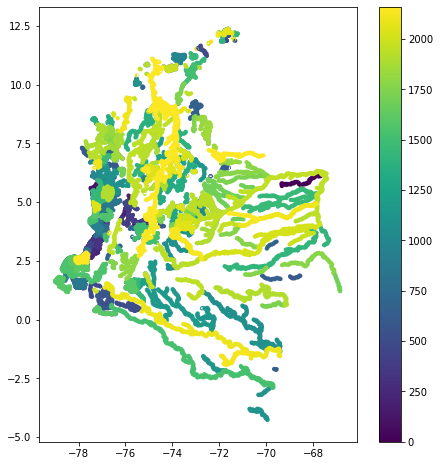

In [18]:
print(flow.final_geometry.shape[0])
flow.final_geometry[CLUSTER_ID] = flow.final_geometry[ID].apply(lambda i : i)
flow.final_geometry.plot(column = CLUSTER_ID, figsize = (8,8), legend=True)